# Student Success Predictor: A Regression Approach

In [366]:
# Data Source: https://archive.ics.uci.edu/dataset/320/student+performance
# Author: Hariharan
# Org: Omdena

In [367]:
import pandas as pd
import os
import seaborn as sns

In [368]:
##General ouline
# 1. Is the data balances (male/female and other features), else generate syntheic data
# 2. Check how each parameter is correlated to final grade
# 3. Model as a regression problem

In [369]:
# List all data files in .zip folder
print(os.listdir('./data'))

['.student.zip_old', 'student+performance.zip', 'student-mat.csv', 'student-merge.R', 'student-por.csv', 'student.txt', 'student.zip']


# Generate a proper dataframe with raw data

In [370]:
# Load CSV files
df1 = pd.read_csv('./data/student-mat.csv')
df2 = pd.read_csv('./data/student-por.csv')

In [371]:
# Data check
df1.head() 
#rows and cols not configured properly

,school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
0,"GP;""F"";18;""U"";""GT3"";""A"";4;4;""at_home"";""teacher..."
1,"GP;""F"";17;""U"";""GT3"";""T"";1;1;""at_home"";""other"";..."
2,"GP;""F"";15;""U"";""LE3"";""T"";1;1;""at_home"";""other"";..."
3,"GP;""F"";15;""U"";""GT3"";""T"";4;2;""health"";""services..."
4,"GP;""F"";16;""U"";""GT3"";""T"";3;3;""other"";""other"";""h..."


In [372]:
# Get number of rows and list of features in dataframe
ROWS_math = df1.shape[0]
FEATURES_math = df1.columns.str.split(';')[0]
FEATURES_dict_math = dict();
for (num, feature) in enumerate(FEATURES_math):
    FEATURES_dict_math[feature] = num


# Print out all values
print('Number of rows in df1', ROWS_math)
print('Feaures in df1', FEATURES_math)
print('Feaures dictionary for df1', FEATURES_dict_math['school'])
print()

Number of rows in df1 395
Feaures in df1 ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']
Feaures dictionary for df1 0



In [373]:
# Create a new dataframe with columns confifured correctly 
df_math = pd.DataFrame()
data = dict()

for feature in FEATURES_math:
    data = list()
    for row in range(ROWS_math):
        data.append(df1.iloc[row].str.split(';')[0][FEATURES_dict_math[str(feature)]])
    df_math[str(feature)] = data

In [374]:
df_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,"""F""",18,"""U""","""GT3""","""A""",4,4,"""at_home""","""teacher""",...,4,3,4,1,1,3,6,"""5""","""6""",6
1,GP,"""F""",17,"""U""","""GT3""","""T""",1,1,"""at_home""","""other""",...,5,3,3,1,1,3,4,"""5""","""5""",6
2,GP,"""F""",15,"""U""","""LE3""","""T""",1,1,"""at_home""","""other""",...,4,3,2,2,3,3,10,"""7""","""8""",10
3,GP,"""F""",15,"""U""","""GT3""","""T""",4,2,"""health""","""services""",...,3,2,2,1,1,5,2,"""15""","""14""",15
4,GP,"""F""",16,"""U""","""GT3""","""T""",3,3,"""other""","""other""",...,4,3,2,1,2,5,4,"""6""","""10""",10


# Data Preprocessing

In [375]:
# Remove double quotes from G1 and G2 columns
for i in range(len(df_math['G1'])):
    df_math['G1'][i] = str(pd.to_numeric(df_math['G1'][i].replace('"', '')))
    df_math['G2'][i] = str(pd.to_numeric(df_math['G2'][i].replace('"', '')))

In [376]:
df_math_before_encoding = df_math.copy()

In [377]:
df_encoded = pd.DataFrame()

In [378]:
# Replace number objects with numeric datatype (integer) and label encode string objecs 
# Print logic for encoding string columns

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
le = LabelEncoder()
categorical_features = list()
categorical_feature_maps = list()

for feature in FEATURES_math:
    df_encoded[str(feature)] = df_math[str(feature)].values
    
    if(df_math[str(feature)][0].isdigit()):
        df_math[str(feature)] = pd.to_numeric(df_math[str(feature)])
    else:
#       Complete encoding of categorical feaures
        df_math[str(feature)] = df_math[str(feature)].astype(str)
        le.fit(df_math[str(feature)])
        df_math[str(feature)] = le.transform(df_math[str(feature)])
        
#       Create seperate list for categorical feaures
        categorical_features.append(feature)
        
#       Display values and categories for categorical feaures
        df_encoded[str(feature) + '_encoded'] = df_math[str(feature)].values
        print(str(feature) + '_encoded')        
        categorical_feature_maps.append(df_encoded.drop_duplicates(str(feature))[[str(feature), str(feature) + '_encoded']])
        print(df_encoded.drop_duplicates(str(feature))[[str(feature), str(feature) + '_encoded']])
        print()

school_encoded
    school  school_encoded
0       GP               0
349     MS               1

sex_encoded
   sex  sex_encoded
0  "F"            0
5  "M"            1

address_encoded
   address  address_encoded
0      "U"                1
24     "R"                0

famsize_encoded
  famsize  famsize_encoded
0   "GT3"                0
2   "LE3"                1

Pstatus_encoded
  Pstatus  Pstatus_encoded
0     "A"                0
1     "T"                1

Mjob_encoded
          Mjob  Mjob_encoded
0    "at_home"             0
3     "health"             1
4      "other"             2
5   "services"             3
10   "teacher"             4

Fjob_encoded
          Fjob  Fjob_encoded
0    "teacher"             4
1      "other"             2
3   "services"             3
10    "health"             1
32   "at_home"             0

reason_encoded
         reason  reason_encoded
0      "course"               0
2       "other"               2
3        "home"               1
5  "reputation

In [379]:
df_math.dtypes

school        int32
sex           int32
age           int64
address       int32
famsize       int32
Pstatus       int32
Medu          int64
Fedu          int64
Mjob          int32
Fjob          int32
reason        int32
guardian      int32
traveltime    int64
studytime     int64
failures      int64
schoolsup     int32
famsup        int32
paid          int32
activities    int32
nursery       int32
higher        int32
internet      int32
romantic      int32
famrel        int64
freetime      int64
goout         int64
Dalc          int64
Walc          int64
health        int64
absences      int64
G1            int64
G2            int64
G3            int64
dtype: object

In [380]:
df_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10


In [381]:
df_math.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,0.116456,0.473418,16.696203,0.777215,0.288608,0.896203,2.749367,2.521519,2.169620,2.281013,...,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,0.321177,0.499926,1.276043,0.416643,0.453690,0.305384,1.094735,1.088201,1.227473,0.863542,...,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,0.000000,0.000000,16.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,...,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,0.000000,0.000000,17.000000,1.000000,0.000000,1.000000,3.000000,2.000000,2.000000,2.000000,...,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,0.000000,1.000000,18.000000,1.000000,1.000000,1.000000,4.000000,3.000000,3.000000,3.000000,...,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


# EDA

In [382]:
print('Total data points:', df_math.count()[0])
print('Female data points:',df_math[df_math['sex'] == 0].count()[0])
print('Male data points:',df_math[df_math['sex'] == 1].count()[0])

Total data points: 395
Female data points: 208
Male data points: 187


In [383]:
G3_avg = df_math['G3'].mean()
print('Final Grade Average:', G3_avg)

Final Grade Average: 10.415189873417722


In [384]:
g1 = df_math.groupby('sex')
G3_avg_female = g1.get_group(0)['G3'].mean()
G3_avg_male = g1.get_group(1)['G3'].mean()

print('Final Grade Average (Female):', G3_avg_female)
print('Final Grade Average (Male):', G3_avg_male)

Final Grade Average (Female): 9.966346153846153
Final Grade Average (Male): 10.914438502673796


In [395]:
plt.show()

School
    school  school_encoded
0       GP               0
349     MS               1


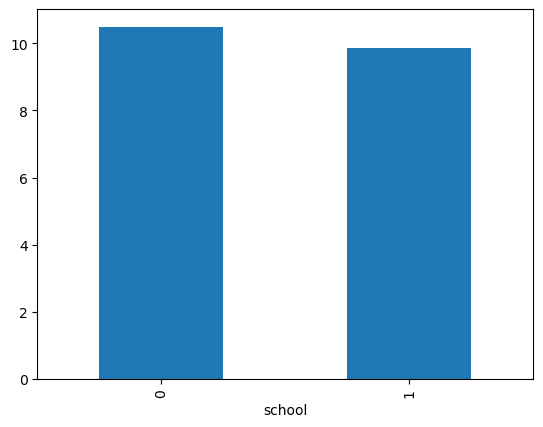

Sex
   sex  sex_encoded
0  "F"            0
5  "M"            1


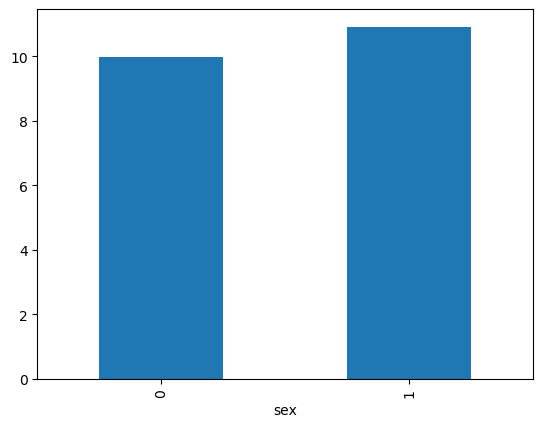

Address
   address  address_encoded
0      "U"                1
24     "R"                0


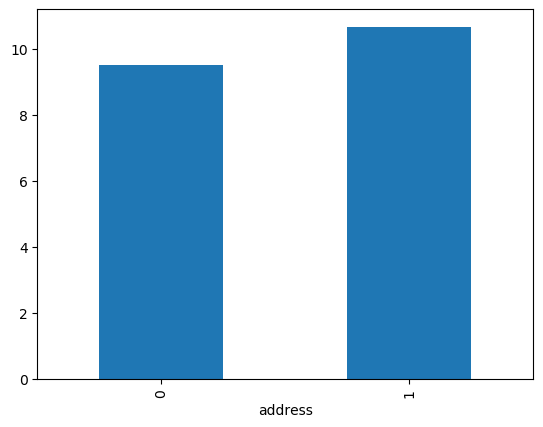

Famsize
  famsize  famsize_encoded
0   "GT3"                0
2   "LE3"                1


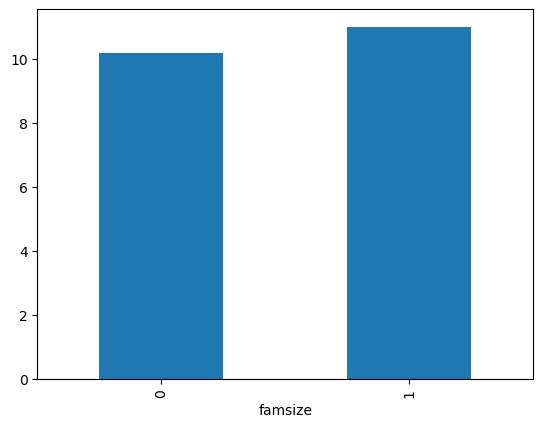

Pstatus
  Pstatus  Pstatus_encoded
0     "A"                0
1     "T"                1


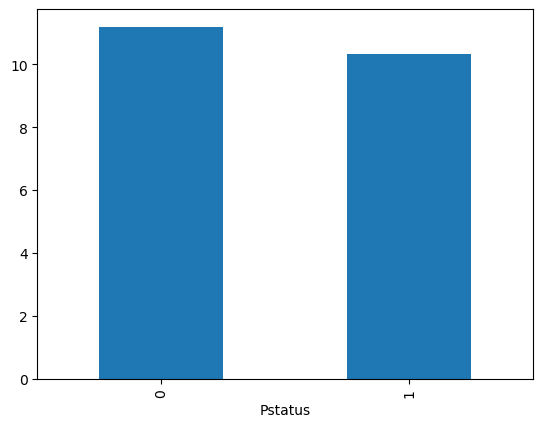

Mjob
          Mjob  Mjob_encoded
0    "at_home"             0
3     "health"             1
4      "other"             2
5   "services"             3
10   "teacher"             4


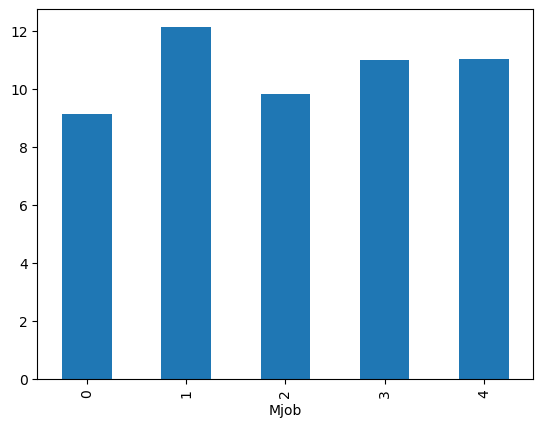

Fjob
          Fjob  Fjob_encoded
0    "teacher"             4
1      "other"             2
3   "services"             3
10    "health"             1
32   "at_home"             0


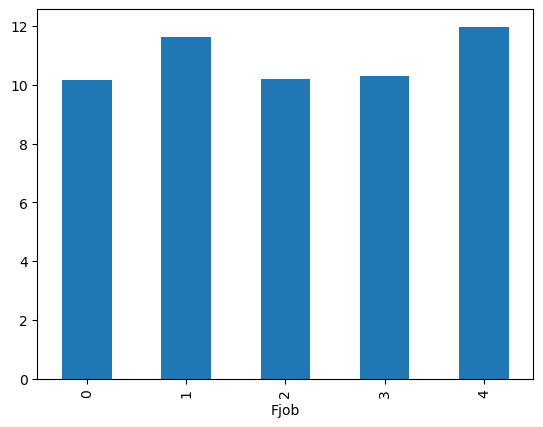

Reason
         reason  reason_encoded
0      "course"               0
2       "other"               2
3        "home"               1
5  "reputation"               3


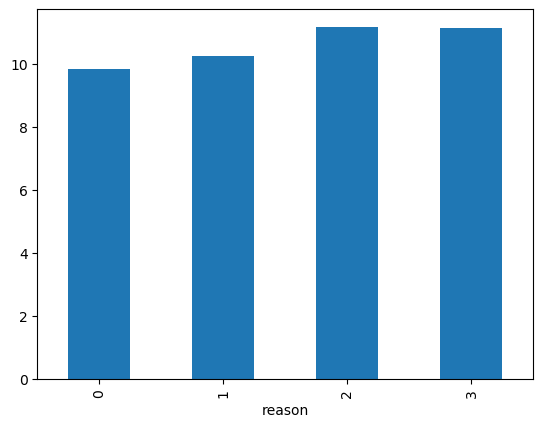

Guardian
    guardian  guardian_encoded
0   "mother"                 1
1   "father"                 0
14   "other"                 2


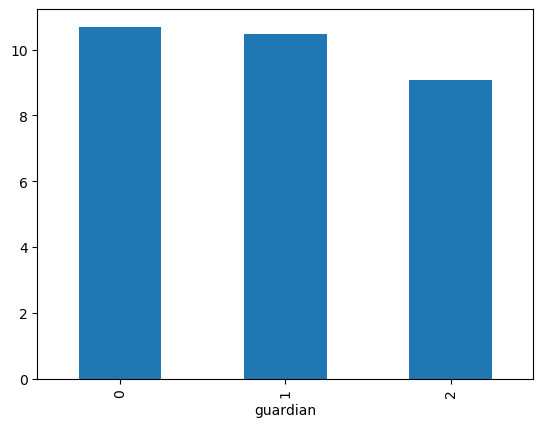

Schoolsup
  schoolsup  schoolsup_encoded
0     "yes"                  1
1      "no"                  0


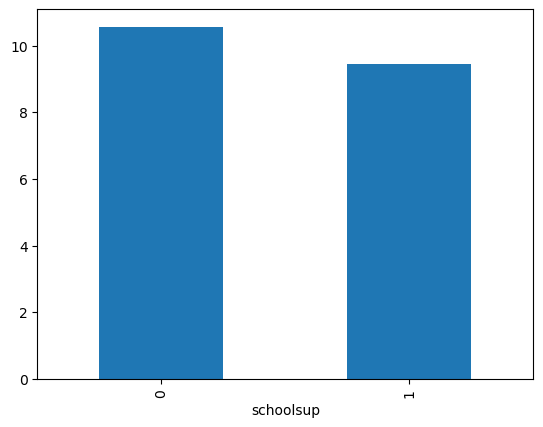

Famsup
  famsup  famsup_encoded
0   "no"               0
1  "yes"               1


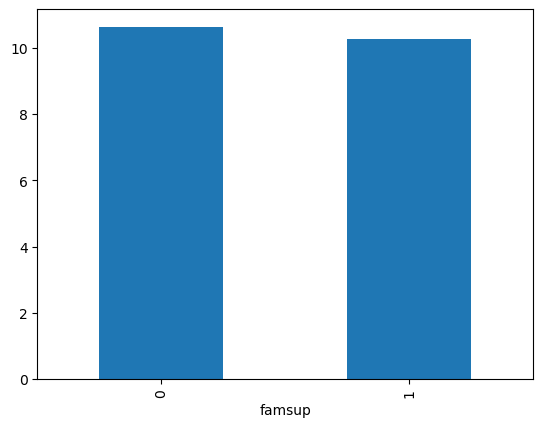

Paid
    paid  paid_encoded
0   "no"             0
2  "yes"             1


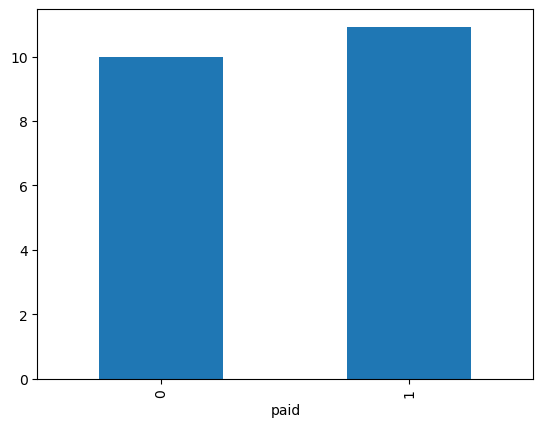

Activities
  activities  activities_encoded
0       "no"                   0
3      "yes"                   1


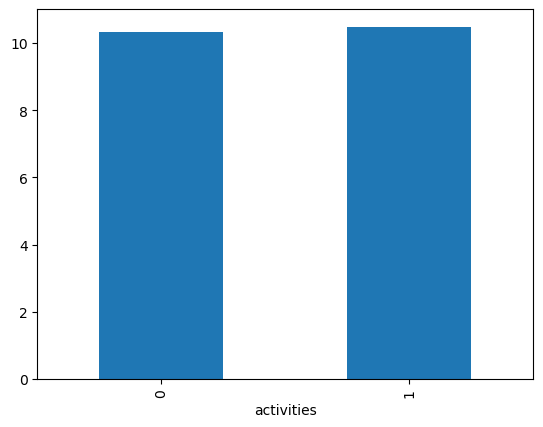

Nursery
  nursery  nursery_encoded
0   "yes"                1
1    "no"                0


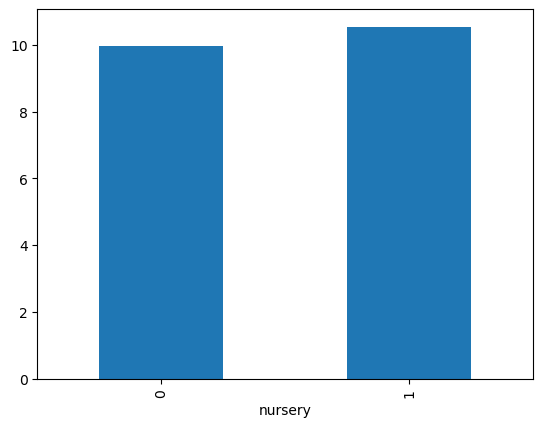

Higher
   higher  higher_encoded
0   "yes"               1
78   "no"               0


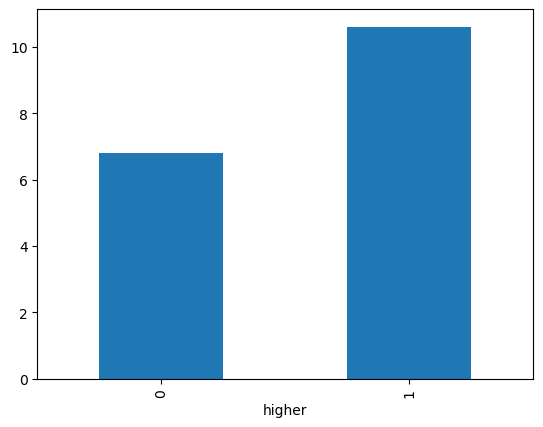

Internet
  internet  internet_encoded
0     "no"                 0
1    "yes"                 1


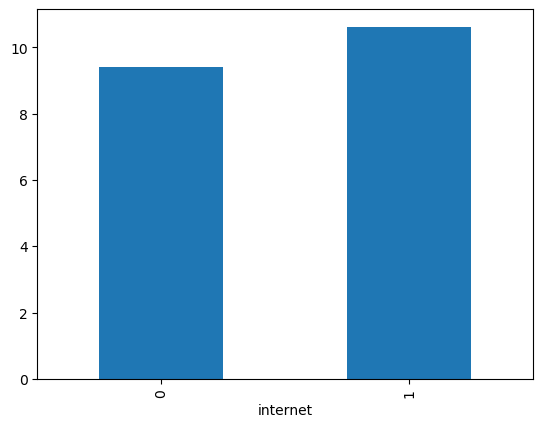

Romantic
  romantic  romantic_encoded
0     "no"                 0
3    "yes"                 1


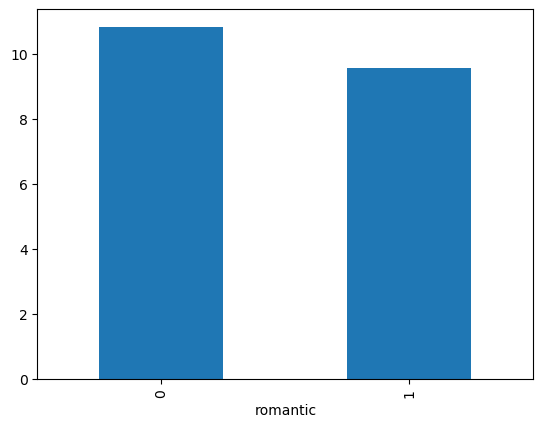

In [402]:
BOLD = '\033[1m' #To print values in bold 
for feature, feature_map in zip(categorical_features, categorical_feature_maps):
    print(BOLD + str(feature).capitalize())
    print(feature_map)
    df_math.groupby(str(feature))['G3'].mean().plot.bar()
    plt.show()

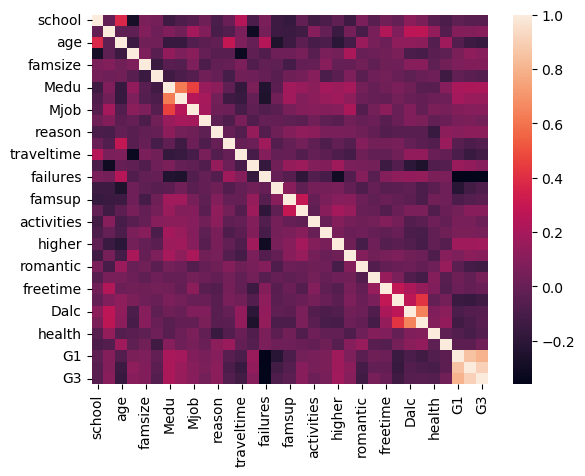

In [386]:
# Plot heatmap
# Since our predictor variable (G3) is is hihl correlated with G1 and G2, those will be sufficient  
corr = df_math.corr()
sns.heatmap(corr)

# Linear Regression (LR)

In [387]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [388]:
X = df_math[['G1', 'G2']]  # Features (independent variables)
y = df_math['G3']  # Target variable (dependent variable)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [389]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [390]:
y_pred_LR = model.predict(X_test)

In [391]:
mse = mean_squared_error(y_test, y_pred_LR)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_LR)

print("Mean Squared Error for LR:", mse)
print("Root Mean Squared Error for LR:", rmse)
print("R-squared for LR:", r2)

Mean Squared Error for LR: 4.2118674966017595
Root Mean Squared Error for LR: 2.0522834834890036
R-squared for LR: 0.7945936216805897


# Deep Neural Network (DNN)

In [393]:
# Imports
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split

input_dim = 2

# Define the DNN model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(input_dim,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
mse = model.evaluate(X_test, y_test)
print('Mean Squared Error:', mse)

# Make predictions
y_pred_DNN = model.predict(X_test)

Epoch 1/50
10/10 [==============================] - 1s 20ms/step - loss: 83.1517 - val_loss: 41.4531
Epoch 2/50
10/10 [==============================] - 0s 6ms/step - loss: 20.6813 - val_loss: 7.7840
Epoch 3/50
10/10 [==============================] - 0s 5ms/step - loss: 5.4080 - val_loss: 4.9684
Epoch 4/50
10/10 [==============================] - 0s 6ms/step - loss: 6.0465 - val_loss: 4.9685
Epoch 5/50
10/10 [==============================] - 0s 4ms/step - loss: 5.0051 - val_loss: 4.5579
Epoch 6/50
10/10 [==============================] - 0s 5ms/step - loss: 4.6886 - val_loss: 4.6859
Epoch 7/50
10/10 [==============================] - 0s 5ms/step - loss: 4.5019 - val_loss: 4.3873
Epoch 8/50
10/10 [==============================] - 0s 5ms/step - loss: 4.3678 - val_loss: 4.3286
Epoch 9/50
10/10 [==============================] - 0s 4ms/step - loss: 4.2384 - val_loss: 4.3254
Epoch 10/50
10/10 [==============================] - 0s 5ms/step - loss: 4.1208 - val_loss: 4.2648
Epoch 11/50
10/

In [394]:
mse = mean_squared_error(y_test, y_pred_DNN)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_DNN)

print("Mean Squared Error for DNN:", mse)
print("Root Mean Squared Error for DNN:", rmse)
print("R-squared for DNN:", r2)

Mean Squared Error for DNN: 4.200009123923892
Root Mean Squared Error for DNN: 2.0493923792002087
R-squared for DNN: 0.7951719364985387
